# 4 Topics:

## Time Series
## NLP
## Clustering
## Principal Component Analysis

# Time Series: (half theory half coding)
## Manipulate, format data, resampling, understand which parameters to pass, such as rolling mean, rolling average, figure out whether a time series is stationary or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np

In [25]:
data = pd.read_csv('../../../Desktop/DS_021720/intro-to-regex-daily-challenge-london-ds/brk_stock_data.csv', skiprows=14)
data.head()

,date,open,high,low,close,volume
0,1980-03-17,290.0,310.0,290.0,290.0,10000
1,1980-03-18,290.0,290.0,290.0,290.0,0
2,1980-03-19,290.0,310.0,290.0,290.0,20000
3,1980-03-20,290.0,290.0,290.0,290.0,0
4,1980-03-21,290.0,290.0,290.0,290.0,0


In [27]:
data.dtypes #necessary in order to know what to format. date needs to be a string

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [29]:
#format the date, as it stands date is not formatted properly and is not positioned to be a time series, let's 
#change that
data['date'] = pd.to_datetime(data['date'], format= '%Y-%m-%d')
data.head(4)

,date,open,high,low,close,volume
0,1980-03-17,290.0,310.0,290.0,290.0,10000
1,1980-03-18,290.0,290.0,290.0,290.0,0
2,1980-03-19,290.0,310.0,290.0,290.0,20000
3,1980-03-20,290.0,290.0,290.0,290.0,0


In [30]:
#set date as the index 
data = data.set_index('date')
data.head(4)

,open,high,low,close,volume
date,,,,,
1980-03-17,290.0,310.0,290.0,290.0,10000
1980-03-18,290.0,290.0,290.0,290.0,0
1980-03-19,290.0,310.0,290.0,290.0,20000
1980-03-20,290.0,290.0,290.0,290.0,0


### Resampling

In [33]:
data[2:4].resample('6h').asfreq()

,open,high,low,close,volume
date,,,,,
1980-03-19 00:00:00,290.0,310.0,290.0,290.0,20000.0
1980-03-19 06:00:00,NaN,NaN,NaN,NaN,NaN
1980-03-19 12:00:00,NaN,NaN,NaN,NaN,NaN
1980-03-19 18:00:00,NaN,NaN,NaN,NaN,NaN
1980-03-20 00:00:00,290.0,290.0,290.0,290.0,0.0


In [34]:
#fill the gaps in the df
data[4:6]

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-24,290.0,290.0,270.0,270.0,10000


In [35]:
#resample the frequency to 1d
data[4:6].resample('1d').asfreq()

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0.0
1980-03-22,NaN,NaN,NaN,NaN,NaN
1980-03-23,NaN,NaN,NaN,NaN,NaN
1980-03-24,290.0,290.0,270.0,270.0,10000.0


In [36]:
data[4:6].resample('1d').pad()

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-22,290.0,290.0,290.0,290.0,0
1980-03-23,290.0,290.0,290.0,290.0,0
1980-03-24,290.0,290.0,270.0,270.0,10000


In [37]:
data[4:6].resample('1d').bfill() #back filling the dates

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-22,290.0,290.0,270.0,270.0,10000
1980-03-23,290.0,290.0,270.0,270.0,10000
1980-03-24,290.0,290.0,270.0,270.0,10000


In [38]:
data[4:6].resample('1d').ffill() #forward fill the dates

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-22,290.0,290.0,290.0,290.0,0
1980-03-23,290.0,290.0,290.0,290.0,0
1980-03-24,290.0,290.0,270.0,270.0,10000


### Unsampling

In [39]:
data[:15] # first 15

,open,high,low,close,volume
date,,,,,
1980-03-17,290.0,310.0,290.0,290.0,10000
1980-03-18,290.0,290.0,290.0,290.0,0
1980-03-19,290.0,310.0,290.0,290.0,20000
1980-03-20,290.0,290.0,290.0,290.0,0
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-24,290.0,290.0,270.0,270.0,10000
1980-03-25,270.0,270.0,270.0,270.0,0
1980-03-26,270.0,270.0,270.0,270.0,0
1980-03-27,270.0,270.0,270.0,270.0,0


In [40]:
#let's resample the volume 
data['volume'].resample('1w').sum()

date
1980-03-23     30000
1980-03-30     10000
1980-04-06     50000
1980-04-13    120000
1980-04-20     70000
               ...  
2020-03-22      5742
2020-03-29      4829
2020-04-05      3011
2020-04-12      2283
2020-04-19      3397
Freq: W-SUN, Name: volume, Length: 2092, dtype: int64

### Differencing

In [44]:
data['volume_diff'] = data['volume'].diff(1)
data.head(5) #there are negative values 

,open,high,low,close,volume,volume_diff
date,,,,,,
1980-03-17,290.0,310.0,290.0,290.0,10000,NaN
1980-03-18,290.0,290.0,290.0,290.0,0,-10000.0
1980-03-19,290.0,310.0,290.0,290.0,20000,20000.0
1980-03-20,290.0,290.0,290.0,290.0,0,-20000.0
1980-03-21,290.0,290.0,290.0,290.0,0,0.0


In [49]:
#differencing loop
data = data.resample('1w').mean()
for col in list(['close', 'volume']):
    data[col+'_diff'] = data[col].diff(1)
data[['close_diff','volume_diff']]

,close_diff,volume_diff
date,,
1980-03-23,NaN,NaN
1980-03-30,-20.00,-4000.00
1980-04-06,-10.00,10500.00
1980-04-13,3.00,11500.00
1980-04-20,-12.00,-10000.00
...,...,...
2020-03-22,-24622.40,88.00
2020-03-29,-302.80,-182.60
2020-04-05,4926.00,-363.60


In [51]:
data['previous_day_close'] = data['close'].shift(1)
data['close_diff'] = data['close'] - data['previous_day_close']
data['daily_return'] = (data['close']/data['previous_day_close']-1)*100
data.tail()

,open,high,low,close,volume,volume_diff,close_diff,previous_day_close,daily_return
date,,,,,,,,,
2020-03-22,263420.062,272882.6240,256020.200,264716.80,1148.40,88.00,-24622.40,289339.20,-8.509874
2020-03-29,262365.100,271070.0980,258297.466,264414.00,965.80,-182.60,-302.80,264716.80,-0.114386
2020-04-05,267755.290,272933.9800,264836.550,269340.00,602.20,-363.60,4926.00,264414.00,1.862988
2020-04-12,282452.750,287316.1675,278411.005,282864.75,570.75,-31.45,13524.75,269340.00,5.021441
2020-04-19,288037.004,288063.8680,281810.752,284592.45,679.40,108.65,1727.70,282864.75,0.610787


### Simple Moving Average

In [52]:
data[-5:] #last five

,open,high,low,close,volume,volume_diff,close_diff,previous_day_close,daily_return
date,,,,,,,,,
2020-03-22,263420.062,272882.6240,256020.200,264716.80,1148.40,88.00,-24622.40,289339.20,-8.509874
2020-03-29,262365.100,271070.0980,258297.466,264414.00,965.80,-182.60,-302.80,264716.80,-0.114386
2020-04-05,267755.290,272933.9800,264836.550,269340.00,602.20,-363.60,4926.00,264414.00,1.862988
2020-04-12,282452.750,287316.1675,278411.005,282864.75,570.75,-31.45,13524.75,269340.00,5.021441
2020-04-19,288037.004,288063.8680,281810.752,284592.45,679.40,108.65,1727.70,282864.75,0.610787


In [53]:
#add rolling and mean together the window will be 3
data[-5:].rolling(window=3).mean()

,open,high,low,close,volume,volume_diff,close_diff,previous_day_close,daily_return
date,,,,,,,,,
2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,264513.484000,272295.567333,259718.072000,266156.933333,905.466667,-152.733333,-6666.400000,272823.333333,-2.253757
2020-04-12,270857.713333,277106.748500,267181.673667,272206.250000,712.916667,-192.550000,6049.316667,266156.933333,2.256681
2020-04-19,279415.014667,282771.338500,275019.435667,278932.400000,617.450000,-95.466667,6726.150000,272206.250000,2.498405


In [54]:
# change the rolling period 
data[-5:].rolling(window='3d', min_periods=3).mean()

,open,high,low,close,volume,volume_diff,close_diff,previous_day_close,daily_return
date,,,,,,,,,
2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exponential Weighted Moving Average

In [55]:
data[-5:].ewm(halflife=1).mean()

,open,high,low,close,volume,volume_diff,close_diff,previous_day_close,daily_return
date,,,,,,,,,
2020-03-22,263420.062000,272882.624000,256020.200000,264716.800000,1148.400000,88.000000,-24622.400000,289339.200000,-8.509874
2020-03-29,262716.754000,271674.273333,257538.377333,264514.933333,1026.666667,-92.400000,-8409.333333,272924.266667,-2.912882
2020-04-05,265595.917429,272394.105714,261708.761714,267272.114286,784.114286,-247.371429,-789.142857,268061.257143,-0.183814
2020-04-12,274586.228133,280352.538667,270616.624800,275588.186667,670.320000,-132.213333,6844.933333,268743.253333,2.592322
2020-04-19,281528.564065,284332.579613,276394.238839,280235.548387,675.006452,-7.896774,4203.780645,276031.767742,1.569594


### Making our data stationary 

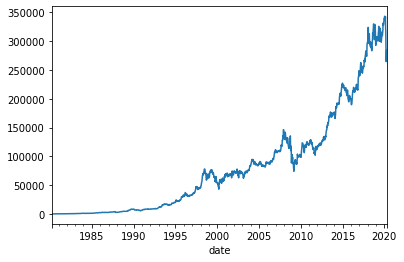

In [59]:
data = data.resample('1w').mean()
time_series = data['close']
time_series.plot() #it has an exponential trend, the variance is not consistent and looks like there is autocorr

In [60]:
#manually check for stationarity 
from statsmodels.tsa.stattools import adfuller
adfuller(time_series)

(1.7387387886846526,
 0.9982194516556845,
 26,
 2065,
 {'1%': -3.4335206767270354,
  '5%': -2.862940658476002,
  '10%': -2.5675156466298095},
 38099.688098799576)

0.006375347657089128

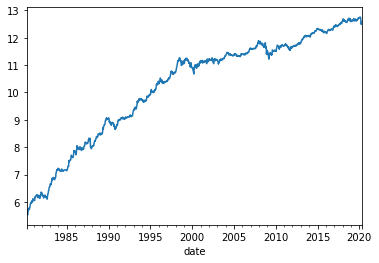

In [117]:
# Detrend with log because the above looks like an exponential (which makes sense hence the EWM)
time_series_log = np.log(time_series)
time_series_log.plot()
adfuller(time_series_log)[1]
# stil a violation of trend 


### Square root

0.9838023713796437

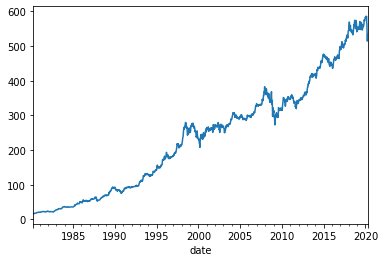

In [63]:
time_series_sqrt = np.sqrt(time_series)
time_series_sqrt.plot()
adfuller(time_series_sqrt)[1]

0.009504202169435323

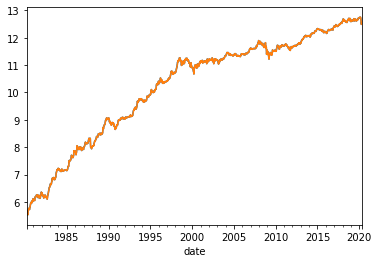

In [64]:
#resample log
time_series_logrs = time_series_log.resample('1d').pad()
time_series_logrs.plot()
logs_ma7 = time_series_logrs.rolling('7d').mean()
logs_ma7.plot()
adfuller(time_series_logrs)[1]

0.0

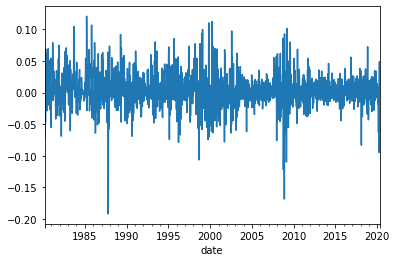

In [65]:
# take the log diff
log_diff = time_series_log.diff(1).bfill()
log_diff.plot()
adfuller(log_diff)[1]

0.0014109679642425447


0.0

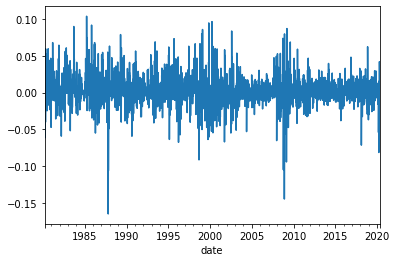

In [66]:
time_series_logrs_nt = time_series_logrs - logs_ma7
print(time_series_logrs_nt.mean())
time_series_logrs_nt.plot()
adfuller(time_series_logrs_nt)[1]

# Natural Language Processing: (more coding than theory)
## Apply model to data, interpret results of transform data, know what they mean

In [69]:
review = 'From the beginning of the movie, it gives the feeling the director is trying to portray something, what I mean to say that instead of the story dictating the style in which the movie should be made, he has gone in the opposite way, he had a type of move that he wanted to make, and wrote a story to suite it. And he has failed in it very badly. I guess he was trying to make a stylish movie. Any way I think this movie is a total waste of time and effort. In the credit of the director, he knows the media that he is working with, what I am trying to say is I have seen worst movies than this. Here at least the director knows to maintain the continuity in the movie. And the actors also have given a decent performance.'

In [67]:
#import necessary functions
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aqureshi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/aqureshi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aqureshi/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### Tokenization
Tokenization is the process of splitting documents into units of observations. We usually represent the tokens as n-gram, where n represent the consecutive words occuring in a document. In the case of unigram (one word token), the sentence "Vishal works here" can be tokenized into?

In [70]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_review = tokenizer.tokenize(review)

The RegexpTokenizer is a tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.



In [71]:
print(tokenized_review)

['From', 'the', 'beginning', 'of', 'the', 'movie', 'it', 'gives', 'the', 'feeling', 'the', 'director', 'is', 'trying', 'to', 'portray', 'something', 'what', 'I', 'mean', 'to', 'say', 'that', 'instead', 'of', 'the', 'story', 'dictating', 'the', 'style', 'in', 'which', 'the', 'movie', 'should', 'be', 'made', 'he', 'has', 'gone', 'in', 'the', 'opposite', 'way', 'he', 'had', 'a', 'type', 'of', 'move', 'that', 'he', 'wanted', 'to', 'make', 'and', 'wrote', 'a', 'story', 'to', 'suite', 'it', 'And', 'he', 'has', 'failed', 'in', 'it', 'very', 'badly', 'I', 'guess', 'he', 'was', 'trying', 'to', 'make', 'a', 'stylish', 'movie', 'Any', 'way', 'I', 'think', 'this', 'movie', 'is', 'a', 'total', 'waste', 'of', 'time', 'and', 'effort', 'In', 'the', 'credit', 'of', 'the', 'director', 'he', 'knows', 'the', 'media', 'that', 'he', 'is', 'working', 'with', 'what', 'I', 'am', 'trying', 'to', 'say', 'is', 'I', 'have', 'seen', 'worst', 'movies', 'than', 'this', 'Here', 'at', 'least', 'the', 'director', 'knows

In [72]:
fdist = FreqDist(tokenized_review)
print(fdist)

<FreqDist with 78 samples and 145 outcomes>


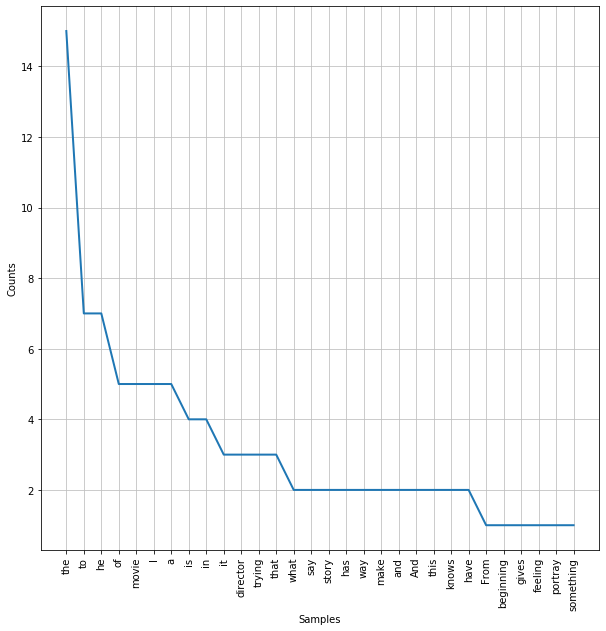

In [73]:
plt.figure(figsize=(10,10))
fdist.plot(30)

Are the words very informative? If we were to extract informatiom based on this frequency distribution of the most common words in tis graph, are we going to get some helpful information or not? Why or why not?



### Stopword Removal

In [74]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'few', 'be', 'all', 'because', 'doing', "she's", 'it', 'should', 'its', 've', "didn't", 'to', "weren't", 'and', 'further', 'an', "wouldn't", 'of', 'against', "needn't", "wasn't", 'too', "you've", 'both', 'not', 'mustn', 'where', 'through', 'about', 'hadn', 'yourself', 'we', 'my', 'just', 'd', 'under', 'hers', 'between', 'itself', 'same', 'their', 'does', 'ourselves', 'what', 'is', 'before', 'don', 'some', 'into', 'those', 'so', 'will', 'most', 'that', 'why', "aren't", 'them', 'above', 'me', 'theirs', 'as', "doesn't", "mustn't", 'very', 'when', 'nor', 'he', 'are', 'each', 'such', 'other', "isn't", 'the', 'after', 'did', 'until', 'myself', 'wouldn', "you'll", "shan't", 'below', 'themselves', 'then', "it's", 'a', 'there', 'no', 're', 'haven', 'wasn', 'any', "don't", 'this', 'his', 'been', 's', 'has', 'who', 'i', 'which', 'm', 'once', "mightn't", 'with', 'shouldn', 'o', 'in', 'yours', 'these', 'your', 'was', 'were', 'at', 'y', 'only', 'him', 'you', "hadn't", 'over', 'isn', 'have', 'if', '

In [75]:
filtered_review=[]
for w in tokenized_review:
    if w not in stop_words:
        filtered_review.append(w)
print("Filterd Sentence:",filtered_review)

Filterd Sentence: ['From', 'beginning', 'movie', 'gives', 'feeling', 'director', 'trying', 'portray', 'something', 'I', 'mean', 'say', 'instead', 'story', 'dictating', 'style', 'movie', 'made', 'gone', 'opposite', 'way', 'type', 'move', 'wanted', 'make', 'wrote', 'story', 'suite', 'And', 'failed', 'badly', 'I', 'guess', 'trying', 'make', 'stylish', 'movie', 'Any', 'way', 'I', 'think', 'movie', 'total', 'waste', 'time', 'effort', 'In', 'credit', 'director', 'knows', 'media', 'working', 'I', 'trying', 'say', 'I', 'seen', 'worst', 'movies', 'Here', 'least', 'director', 'knows', 'maintain', 'continuity', 'movie', 'And', 'actors', 'also', 'given', 'decent', 'performance']


In [76]:
print(len(tokenized_review))
print(len(filtered_review))

145
72


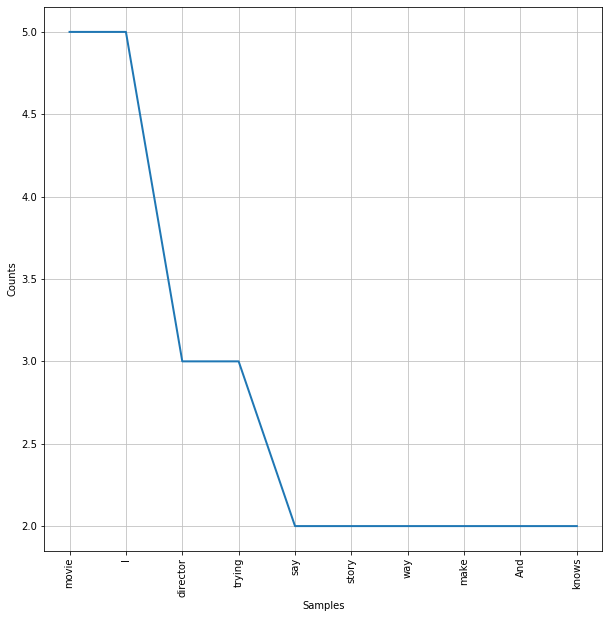

In [77]:
fdist = FreqDist(filtered_review)
plt.figure(figsize=(10,10))
fdist.plot(10)

### Stemming
Stemming allows us to remove different variations of the same word. For example, collect, collection and collecting will all be reduced to the same single word collect.

Stemming is the process of reducing inflection in words to their root forms, such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

Stems are created by removing the suffixes or prefixes used with a word. 

In [78]:
# Stemming
from nltk.stem import PorterStemmer

In [79]:
ps = PorterStemmer()

stemmed_review=[]
for w in filtered_review:
    stemmed_review.append(ps.stem(w))

print(stemmed_review)

['from', 'begin', 'movi', 'give', 'feel', 'director', 'tri', 'portray', 'someth', 'I', 'mean', 'say', 'instead', 'stori', 'dictat', 'style', 'movi', 'made', 'gone', 'opposit', 'way', 'type', 'move', 'want', 'make', 'wrote', 'stori', 'suit', 'and', 'fail', 'badli', 'I', 'guess', 'tri', 'make', 'stylish', 'movi', 'ani', 'way', 'I', 'think', 'movi', 'total', 'wast', 'time', 'effort', 'In', 'credit', 'director', 'know', 'media', 'work', 'I', 'tri', 'say', 'I', 'seen', 'worst', 'movi', 'here', 'least', 'director', 'know', 'maintain', 'continu', 'movi', 'and', 'actor', 'also', 'given', 'decent', 'perform']


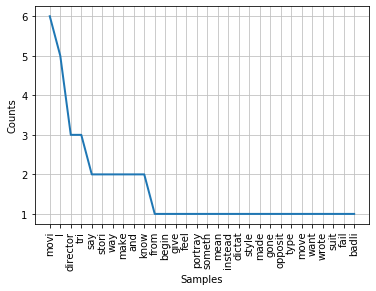

In [81]:
fdist = FreqDist(stemmed_review)
fdist.plot(30)

### Lemmatization
The only difference between lemmatization and stemming is that lemmatization returns real words. For example, instead of returning "movi" like Porter stemmer would, "movie" will be returned by the lemmatizer.

Unlike Stemming, Lemmatization reduces the inflected words properly ensuring that the root word belongs to the language.

In Lemmatization, the root word is called Lemma.

A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

In [83]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

In [84]:
print("movies:", lemmatizer.lemmatize("movies")) 
print("collecting:", lemmatizer.lemmatize("collecting")) 
print("collection:", lemmatizer.lemmatize("collection")) 
print("collections:", lemmatizer.lemmatize("collections"))

movies: movie
collecting: collecting
collection: collection
collections: collection


In [85]:
# comparing it with stemming 
print("movies:", ps.stem("movies")) 
print("collecting :", ps.stem("collecting"))

movies: movi
collecting : collect


In [86]:
# we can also lemmatize our original reviews
lemmatized_review=[]
for w in filtered_review:
    lemmatized_review.append(lemmatizer.lemmatize(w))

print(lemmatized_review)

['From', 'beginning', 'movie', 'give', 'feeling', 'director', 'trying', 'portray', 'something', 'I', 'mean', 'say', 'instead', 'story', 'dictating', 'style', 'movie', 'made', 'gone', 'opposite', 'way', 'type', 'move', 'wanted', 'make', 'wrote', 'story', 'suite', 'And', 'failed', 'badly', 'I', 'guess', 'trying', 'make', 'stylish', 'movie', 'Any', 'way', 'I', 'think', 'movie', 'total', 'waste', 'time', 'effort', 'In', 'credit', 'director', 'know', 'medium', 'working', 'I', 'trying', 'say', 'I', 'seen', 'worst', 'movie', 'Here', 'least', 'director', 'know', 'maintain', 'continuity', 'movie', 'And', 'actor', 'also', 'given', 'decent', 'performance']


### Feature Engineering for NLP
The machine learning algorithms we have encountered so far represent features as the variables that take on different value for each observation. For example, we represent individual with distinct education level, income, and such. However, in NLP, features are represented in very different way. In order to pass text data to machine learning algorithm and perform classification, we need to represent the features in a sensible way. One such method is called Bag-of-words (BoW).

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling. A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

A vocabulary of known words.
A measure of the presence of known words.
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document. The intuition behind BoW is that a document is similar to another if they have similar contents. Bag of Words method can be represented as Document Term Matrix, or Term Document Matrix, in which each column is an unique vocabulary, each observation is a document. For example:

Document 1: "I love dogs"
Document 2: "I love cats"
Document 3: "I love all animals"
Can be represented as:

In [87]:
# implementing it in python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

docs = ['I love dogs','I love cats','I love all animals']
vec = CountVectorizer(stop_words=None)
X = vec.fit_transform(docs)


df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df

,all,animals,cats,dogs,love
0,0,0,0,1,1
1,0,0,1,0,1
2,1,1,0,0,1


In [88]:
vec.get_feature_names()


['all', 'animals', 'cats', 'dogs', 'love']

### TF-IDF
There are many schemas for determining the values of each entry in a document term matrix, and one of the most common schema is called the TF-IDF -- term frequency-inverse document frequency. Essentially, tf-idf normalizes the raw count of the document term matrix. And it represents how important a word is in the given document.

TF (Term Frequency) term frequency is simply the frequency of words in a document, and it can be represented as the number of times a term shows up in a document.

IDF (inverse document frequency) IDF represents the measure of how much information the word provides, i.e., if it's common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient):

$$idf(w) = log (\frac{number of documents}{num of documents containing W})$$
tf-idf is the product of term frequency and inverse document frequency, or tf * idf.

In [89]:
# let's implement it 
import pandas as pd
review_1 = "6/10 Acting, not great but some good acting.<br /><br />4/10 Director, makes some stupid decisions for this film.<br /><br />2/10 Writer, story makes no sense at all and has huge amount of flaws.<br /><br />4/10 Overall score for this movie.<br /><br />Don't waste your time with this film, it's not worth it. I gave 4 for this movie and it may be too much. Characters are so over exaggerated than they can ever be in real life and some pretty unexplainable stuff happens 'storywise', not in good way. Because of the style this film has been filmed you get bored after 30 minutes (too many special effects: slow motions and camera shakes and fast forwards). It's always good that movie uses music to make the story go smooth but there's too many tracks in this one. In the first hour there is almost 50/50 dialogs and musics"
review_2 = "Devil Hunter gained notoriety for the fact that it's on the DPP 'Video Nasty' list, but it really needn't have been. Many films on the list where there for God (and DPP) only known reasons, and while this isn't the tamest of the bunch; there isn't a lot here that warrants banning...which is a shame because I never would have sat through it where it not for the fact that it's on 'the shopping list'. The plot actually gives the film a decent base - or at least more of a decent base than most cannibal films - and it follows an actress who is kidnapped and dragged off into the Amazon jungle. A hunter is then hired to find her, but along the way he has to brave the natives, lead by a man who calls himself 'The Devil' (hence the title). The film basically just plods along for eighty five minutes and there really aren't many scenes of interest. It's a real shame that Jess Franco ended up making films like this because the man clearly has talent; as seen by films such as The Diabolical Dr Z, Venus in Furs, Faceless and She Kills in Ecstasy, but unfortunately his good films are just gems amongst heaps of crap and Devil Hunter is very much a part of the crap. I saw this film purely because I want to be able to say I've seen everything on the DPP's list (just two more to go!), and I'm guessing that's why most other people who have seen it, saw it. But if you're not on the lookout for Nasties; there really is no reason to bother with this one."
review_3 = "`Stanley and Iris' is a heart warming film about two people who find each other and help one another overcome their problems in life. Stanley's life is difficult, because he never learned to read or write. Iris is a widower with two teenage children working in a bakery where she meets Stanley. She decides to teach Stanley how to read at her home in her spare time. Over time they become romantically involved. After Stanley learns to read, he goes off to a good job in Chicago, only to return to Iris and ask her to marry him.<br /><br />It's a really good film without nudity, violence, or profanity, that which is rare in today's films. A good film all round. <br /><br />"
review_4 = "This may not be a memorable classic, but it is a touching romance with an important theme that stresses the importance of literacy in modern society and the devastating career and life consequences for any unfortunate individual lacking this vital skill.<br /><br />The story revolves around Iris, a widow who becomes acquainted with a fellow employee at her factory job, an illiterate cafeteria worker named Stanley. Iris discovers that Stanley is unable to read, and after he loses his job, she gives him reading lessons at home in her kitchen. Of course, as you might predict, the two, although initially wary of involvement, develop feelings for each other...<br /><br />Jane Fonda competently plays Iris, a woman with problems of her own, coping with a job lacking prospects, two teenage children (one pregnant), an unemployed sister and her abusive husband. However, Robert DeNiro is of course brilliant in his endearing portrayal of the intelligent and resourceful, but illiterate, Stanley, bringing a dignity to the role that commands respect. They aren't your typical charming young yuppie couple, as generally depicted in on screen romances, but an ordinary working class, middle aged pair with pretty down to earth struggles.<br /><br />I won't give the ending away, but it's a lovely, heartwarming romance and a personal look into the troubling issue of adult illiteracy, albeit from the perspective of a fictional character."
df = pd.DataFrame([review_1,review_2,review_3, review_4],columns = ['review'])
df

,review
0,"6/10 Acting, not great but some good acting.<b..."
1,Devil Hunter gained notoriety for the fact tha...
2,`Stanley and Iris' is a heart warming film abo...
3,"This may not be a memorable classic, but it is..."


In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['review'])

In [92]:
type(text_counts)

scipy.sparse.csr.csr_matrix

In [93]:
pd.DataFrame(text_counts)

,0
0,"(0, 5)\t1\n (0, 0)\t4\n (0, 9)\t2\n (0, 1..."
1,"(0, 100)\t1\n (0, 84)\t3\n (0, 233)\t4\n ..."
2,"(0, 100)\t3\n (0, 25)\t4\n (0, 84)\t3\n (..."
3,"(0, 25)\t6\n (0, 226)\t1\n (0, 233)\t2\n ..."


In [94]:
df = pd.DataFrame(text_counts.todense(),columns = cv.get_feature_names())
df

,10,2,30,4,50,6,able,abusive,acquainted,acting,...,woman,won,worker,working,worth,write,writer,young,yuppie,z
0,4,1,1,3,2,1,0,0,0,2,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,...,1,1,1,1,0,0,0,1,1,0


In [95]:
df.columns

Index(['10', '2', '30', '4', '50', '6', 'able', 'abusive', 'acquainted',
       'acting',
       ...
       'woman', 'won', 'worker', 'working', 'worth', 'write', 'writer',
       'young', 'yuppie', 'z'],
      dtype='object', length=275)

In [96]:
# use tfidf vectorizer instead
review_1 = "6/10 Acting, not great but some good acting.<br /><br />4/10 Director, makes some stupid decisions for this film.<br /><br />2/10 Writer, story makes no sense at all and has huge amount of flaws.<br /><br />4/10 Overall score for this movie.<br /><br />Don't waste your time with this film, it's not worth it. I gave 4 for this movie and it may be too much. Characters are so over exaggerated than they can ever be in real life and some pretty unexplainable stuff happens 'storywise', not in good way. Because of the style this film has been filmed you get bored after 30 minutes (too many special effects: slow motions and camera shakes and fast forwards). It's always good that movie uses music to make the story go smooth but there's too many tracks in this one. In the first hour there is almost 50/50 dialogs and musics"
review_2 = "Devil Hunter gained notoriety for the fact that it's on the DPP 'Video Nasty' list, but it really needn't have been. Many films on the list where there for God (and DPP) only known reasons, and while this isn't the tamest of the bunch; there isn't a lot here that warrants banning...which is a shame because I never would have sat through it where it not for the fact that it's on 'the shopping list'. The plot actually gives the film a decent base - or at least more of a decent base than most cannibal films - and it follows an actress who is kidnapped and dragged off into the Amazon jungle. A hunter is then hired to find her, but along the way he has to brave the natives, lead by a man who calls himself 'The Devil' (hence the title). The film basically just plods along for eighty five minutes and there really aren't many scenes of interest. It's a real shame that Jess Franco ended up making films like this because the man clearly has talent; as seen by films such as The Diabolical Dr Z, Venus in Furs, Faceless and She Kills in Ecstasy, but unfortunately his good films are just gems amongst heaps of crap and Devil Hunter is very much a part of the crap. I saw this film purely because I want to be able to say I've seen everything on the DPP's list (just two more to go!), and I'm guessing that's why most other people who have seen it, saw it. But if you're not on the lookout for Nasties; there really is no reason to bother with this one."
review_3 = "`Stanley and Iris' is a heart warming film about two people who find each other and help one another overcome their problems in life. Stanley's life is difficult, because he never learned to read or write. Iris is a widower with two teenage children working in a bakery where she meets Stanley. She decides to teach Stanley how to read at her home in her spare time. Over time they become romantically involved. After Stanley learns to read, he goes off to a good job in Chicago, only to return to Iris and ask her to marry him.<br /><br />It's a really good film without nudity, violence, or profanity, that which is rare in today's films. A good film all round. <br /><br />"
review_4 = "This may not be a memorable classic, but it is a touching romance with an important theme that stresses the importance of literacy in modern society and the devastating career and life consequences for any unfortunate individual lacking this vital skill.<br /><br />The story revolves around Iris, a widow who becomes acquainted with a fellow employee at her factory job, an illiterate cafeteria worker named Stanley. Iris discovers that Stanley is unable to read, and after he loses his job, she gives him reading lessons at home in her kitchen. Of course, as you might predict, the two, although initially wary of involvement, develop feelings for each other...<br /><br />Jane Fonda competently plays Iris, a woman with problems of her own, coping with a job lacking prospects, two teenage children (one pregnant), an unemployed sister and her abusive husband. However, Robert DeNiro is of course brilliant in his endearing portrayal of the intelligent and resourceful, but illiterate, Stanley, bringing a dignity to the role that commands respect. They aren't your typical charming young yuppie couple, as generally depicted in on screen romances, but an ordinary working class, middle aged pair with pretty down to earth struggles.<br /><br />I won't give the ending away, but it's a lovely, heartwarming romance and a personal look into the troubling issue of adult illiteracy, albeit from the perspective of a fictional character."
df = pd.DataFrame([review_1,review_2,review_3, review_4],columns = ['review'])
df

,review
0,"6/10 Acting, not great but some good acting.<b..."
1,Devil Hunter gained notoriety for the fact tha...
2,`Stanley and Iris' is a heart warming film abo...
3,"This may not be a memorable classic, but it is..."


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['review'])
text_tf.data

array([0.06926739, 0.06926739, 0.13853478, 0.06926739, 0.0361466 ,
       0.06926739, 0.06926739, 0.0361466 , 0.06926739, 0.10922241,
       0.06926739, 0.05461121, 0.06926739, 0.0361466 , 0.06926739,
       0.06926739, 0.0361466 , 0.06926739, 0.06926739, 0.06926739,
       0.06926739, 0.06926739, 0.06926739, 0.06926739, 0.06926739,
       0.06926739, 0.10922241, 0.05461121, 0.06926739, 0.04421248,
       0.06926739, 0.06926739, 0.04421248, 0.06926739, 0.05461121,
       0.06926739, 0.13263743, 0.04421248, 0.05461121, 0.06926739,
       0.06926739, 0.06926739, 0.06926739, 0.05461121, 0.04421248,
       0.05461121, 0.14458639, 0.06926739, 0.06926739, 0.04421248,
       0.05461121, 0.06926739, 0.05461121, 0.06926739, 0.05461121,
       0.06926739, 0.05461121, 0.20780217, 0.08842496, 0.05461121,
       0.06926739, 0.06926739, 0.14458639, 0.0361466 , 0.05461121,
       0.05461121, 0.06926739, 0.06926739, 0.20780217, 0.06926739,
       0.06926739, 0.06926739, 0.08842496, 0.06926739, 0.06926

In [105]:
# examine what type of object text_tf is
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

def fn_tdm_df(docs, xColNames = None, **kwargs):
    ''' create a term document matrix as pandas DataFrame
    with **kwargs you can pass arguments of CountVectorizer
    if xColNames is given the dataframe gets columns Names'''

    #initialize the  vectorizer
    vectorizer = CountVectorizer(**kwargs)
    x1 = vectorizer.fit_transform(docs)
    #create dataFrame
    df = pd.DataFrame(x1.toarray(), columns = vectorizer.get_feature_names())

   # if xColNames is not None:
      #  df.columns = xColNames

    return df

In [106]:
fn_tdm_df(df['review'])

,10,30,50,able,about,abusive,acquainted,acting,actress,actually,...,worker,working,worth,would,write,writer,you,young,your,yuppie
0,4,1,2,0,0,0,0,2,0,0,...,0,0,1,0,0,1,1,0,1,0
1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,1,1,0,0,0,0,1,1,1,1


In [111]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def fn_tdm_tfidf(docs, xColNames = None, **kwargs):
    
    tf=TfidfVectorizer()
    x2 = tf.fit_transform(docs)
    #create dataframe
    df2 = pd.DataFrame(x2.toarray(), columns = tf.get_feature_names())
    
    return df2


In [112]:
fn_tdm_tfidf(df['review'])

,10,30,50,able,about,abusive,acquainted,acting,actress,actually,...,worker,working,worth,would,write,writer,you,young,your,yuppie
0,0.27707,0.069267,0.138535,0.000000,0.000000,0.000000,0.000000,0.138535,0.000000,0.000000,...,0.000000,0.000000,0.069267,0.000000,0.000000,0.069267,0.044212,0.000000,0.054611,0.000000
1,0.00000,0.000000,0.000000,0.042847,0.000000,0.000000,0.000000,0.000000,0.042847,0.042847,...,0.000000,0.000000,0.000000,0.042847,0.000000,0.000000,0.027349,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.086069,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.067858,0.000000,0.000000,0.086069,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.059012,0.059012,0.000000,0.000000,0.000000,...,0.059012,0.046525,0.000000,0.000000,0.000000,0.000000,0.037666,0.059012,0.046525,0.059012


In [115]:
#make new function using tf idf 
#end product you want to see if a document term matrix
#then try to see how much more we can do, pass into vectorizer stop words and pass in regex pattern to get tokens
#once you have doc term matrix do eda --> freq dist

In [114]:
fn_tdm_tfidf(df['review']).transpose()

,0,1,2,3
10,0.277070,0.000000,0.000000,0.000000
30,0.069267,0.000000,0.000000,0.000000
50,0.138535,0.000000,0.000000,0.000000
able,0.000000,0.042847,0.000000,0.000000
about,0.000000,0.000000,0.086069,0.000000
...,...,...,...,...
writer,0.069267,0.000000,0.000000,0.000000
you,0.044212,0.027349,0.000000,0.037666
young,0.000000,0.000000,0.000000,0.059012
your,0.054611,0.000000,0.000000,0.046525


In [116]:
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
tfidf = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= tfidf.fit_transform(df['review'])

In [118]:
type(text_counts)

scipy.sparse.csr.csr_matrix

In [119]:
pd.DataFrame(text_counts)

,0
0,"(0, 163)\t0.08761564781556767\n (0, 59)\t0...."
1,"(0, 24)\t0.0710195140485764\n (0, 194)\t0.0..."
2,"(0, 205)\t0.11198436495278705\n (0, 241)\t0..."
3,"(0, 35)\t0.0819300459032351\n (0, 83)\t0.08..."


# KMeans Clustering: (more theory than coding)
## silhouette selection, important params, what they mean

In [123]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

In [124]:
#Generate some data
X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=3, 
                  cluster_std=0.8,
                  random_state=21720 
                 )

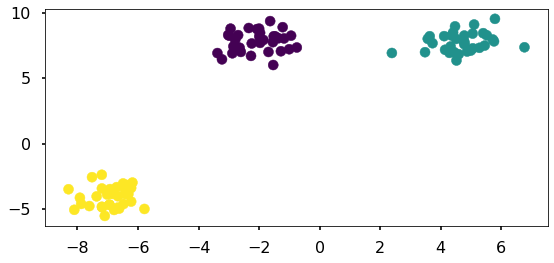

In [128]:
plt.figure(figsize=(9,4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.show()

### K-means is based on the euclidean distance between centroids, the concept of similiarity between the distances. The closer they are to one cluster, the more similar they are. 

The more features the more complicated. K-means is computationally intensive. Then you check the minimum distance and you assign the cluster to a data point. If you have three clusters you need to do three euclidean distances. 

Before doing clustering, you do a k-means and reduce. This way the clustering and k is done much faster. 


### K-Means 2 Clusters

In [129]:
km2 = KMeans(n_clusters=2, 
             n_init=20,
             init='k-means++',
             algorithm='auto',
             random_state=21720,
             tol=0.0001,
             max_iter=1000,
             verbose=0
            )
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=21720, tol=0.0001, verbose=0)

In [130]:
km2.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int32)

### 3 Clusters

In [132]:
km3 = KMeans(n_clusters=3, 
            n_init=20, 
            random_state=21720)
km3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=21720, tol=0.0001, verbose=0)

In [133]:
km3.labels_

array([1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2,
       2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1], dtype=int32)

In [134]:
pd.Series(km3.labels_).value_counts(normalize=True) #we see that the presence of the clusters are the same, 
#if you assume that they are equally sized then this is a hint that this k is the the K!

2    0.34
1    0.33
0    0.33
dtype: float64

In [135]:
km3.cluster_centers_ #final centroids coordinates

array([[ 4.69052665,  7.77030388],
       [-6.90836349, -4.07067971],
       [-2.05264982,  7.83263264]])

In [136]:
# Sum of distances of samples to their closest cluster center.
km3.inertia_#actual score, the best intertia that has been found 

107.96524480953492

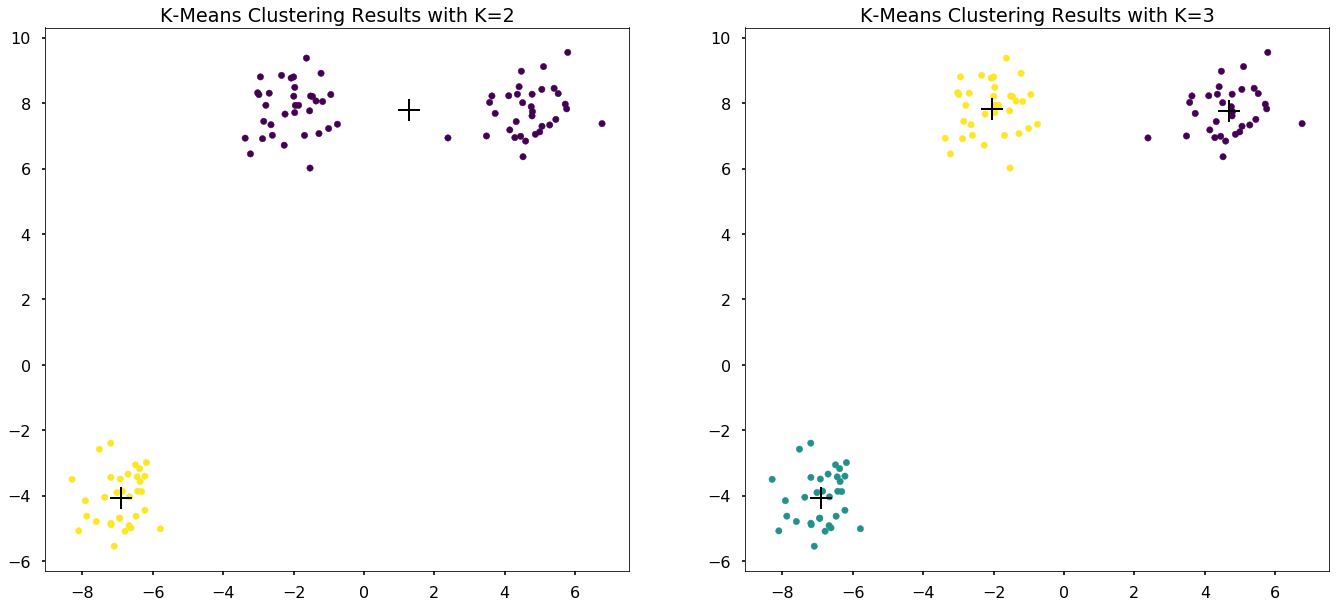

In [137]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(23,10))

ax1.scatter(X[:,0], X[:,1], s=40, c=km2.labels_) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=500, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km3.labels_) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], marker='+', s=500, c='k', linewidth=2)
plt.show()

### updating what the cluster is, k2 --> 2 clusters, k3 --> 3 clusters, k4 --> the model will try to find 4 clusters because we put a k greater than 3, important to think that we don't know the true K for CC. in real world we will use hierarchical

## Clusters?
If you don't know the number of final clusters that you are trying to find, you shoud use `Hierarchical Clustering`. However, let's said that you are forced to  use `K Means` without knowing `k`:

**In order to adress this task, we will use the Elbow method:**

In [138]:
# Preprocessing is needed. Scale the data, similarity depends on the variables (dimensions and the scale of them)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create empty list for silhouette scores
silhouette_scores_list = []

# Create empty list for inertia scores
inertia_scores = []

# Range of k values to try
k_values = range(2, 10)

for k in k_values:
    km =  KMeans(n_clusters=k,
                 n_init=20,
                 random_state=21720,
                 tol=0.00001
                )
    km.fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_, metric='euclidean', random_state=21720)
    silhouette_scores_list.append(score)
    inertia_scores.append(km.inertia_)

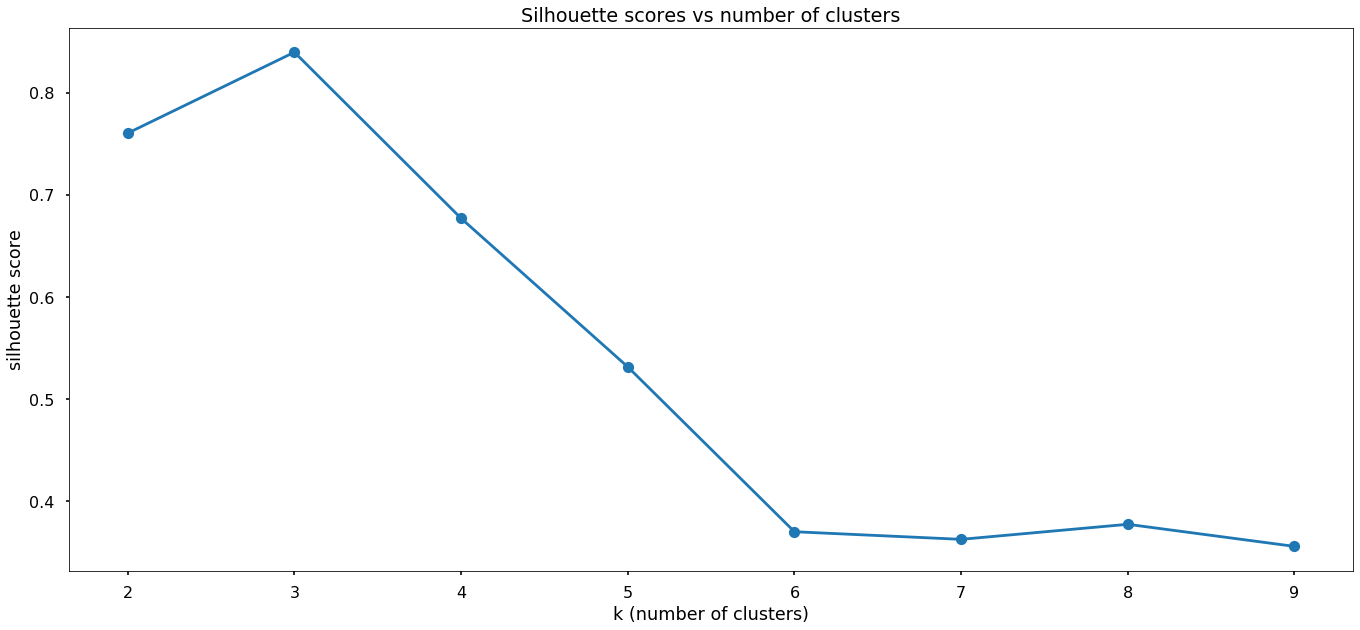

In [139]:
plt.figure(figsize=(23,10))
plt.plot(k_values, silhouette_scores_list, marker='o')
plt.title('Silhouette scores vs number of clusters')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')
plt.show() #the greater the silhouette score, the better, this shows that 3 is the best K! 

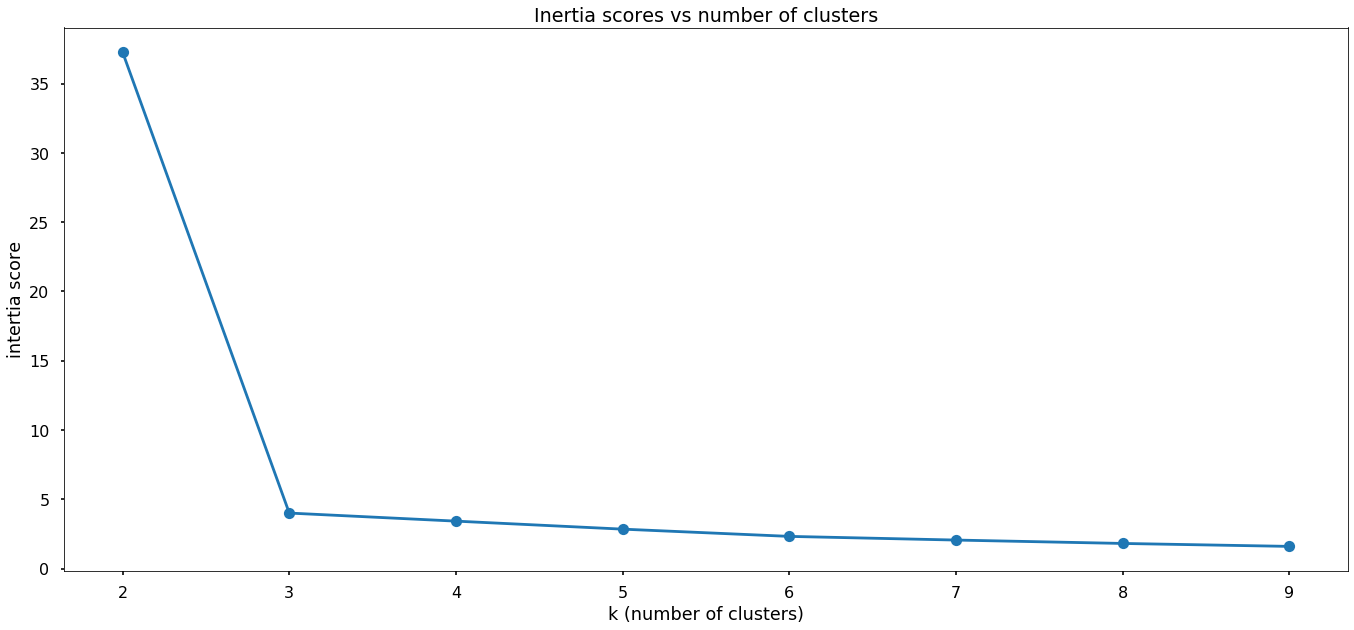

In [140]:
plt.figure(figsize=(23,10))
plt.plot(k_values, inertia_scores, marker='o')
plt.title('Inertia scores vs number of clusters')
plt.xlabel('k (number of clusters)')
plt.ylabel('intertia score')
plt.show() # the lower the inertia the better
# you have to apply the elbow critiria/method. 
#the elbow method tells you that the best K, the one with the lowest inertia but is driving the best change, 
#it forms an elbow, and choose that one, if you have more than one elbow, than we choose the second criteria 
#(inertia we check lowest, and silhouette we look for highest greatest) within the elbow for both
#

There is a clear "elbow" in the `silhouette score` graph at 3 clusters, and it looks like there is an elbow at 3 clusters as well in the second graph where we're using `Within Cluster Sum of Squares`, also known as `Inertia`, as our evaluation metric. These evidences suggest that there are 3 clusters as indeed we know that they are because we generated the data setting the number of clusters to 3.

# Principal Component Analysis (PCA): (more coding than theory)
## know how to run a PCA, when is it useful, be able to run one with interpretation

In [141]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df = pd.read_csv("hiphop.csv")
df.head()

,title,artist,points,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Juicy,The Notorious B.I.G.,140,1994,0.889,0.816,9,-4.670,1,0.2470,0.47200,0.000000,0.2040,0.777,96.056
1,Fight The Power,Public Enemy,100,1989,0.797,0.582,2,-12.970,1,0.2550,0.00484,0.000002,0.5170,0.415,105.974
2,Shook Ones (Part II),Mobb Deep,94,1995,0.637,0.878,6,-5.506,1,0.3690,0.07620,0.000000,0.1180,0.652,94.921
3,The Message,Grandmaster Flash & The Furious Five,90,1982,0.947,0.607,10,-10.580,0,0.2020,0.02490,0.000005,0.0861,0.732,100.619
4,Nuthin’ But A ‘G’ Thang,Dr Dre ft. Snoop Doggy Dogg,84,1992,0.766,0.559,11,-7.030,0,0.0469,0.41600,0.906000,0.1660,0.611,94.662


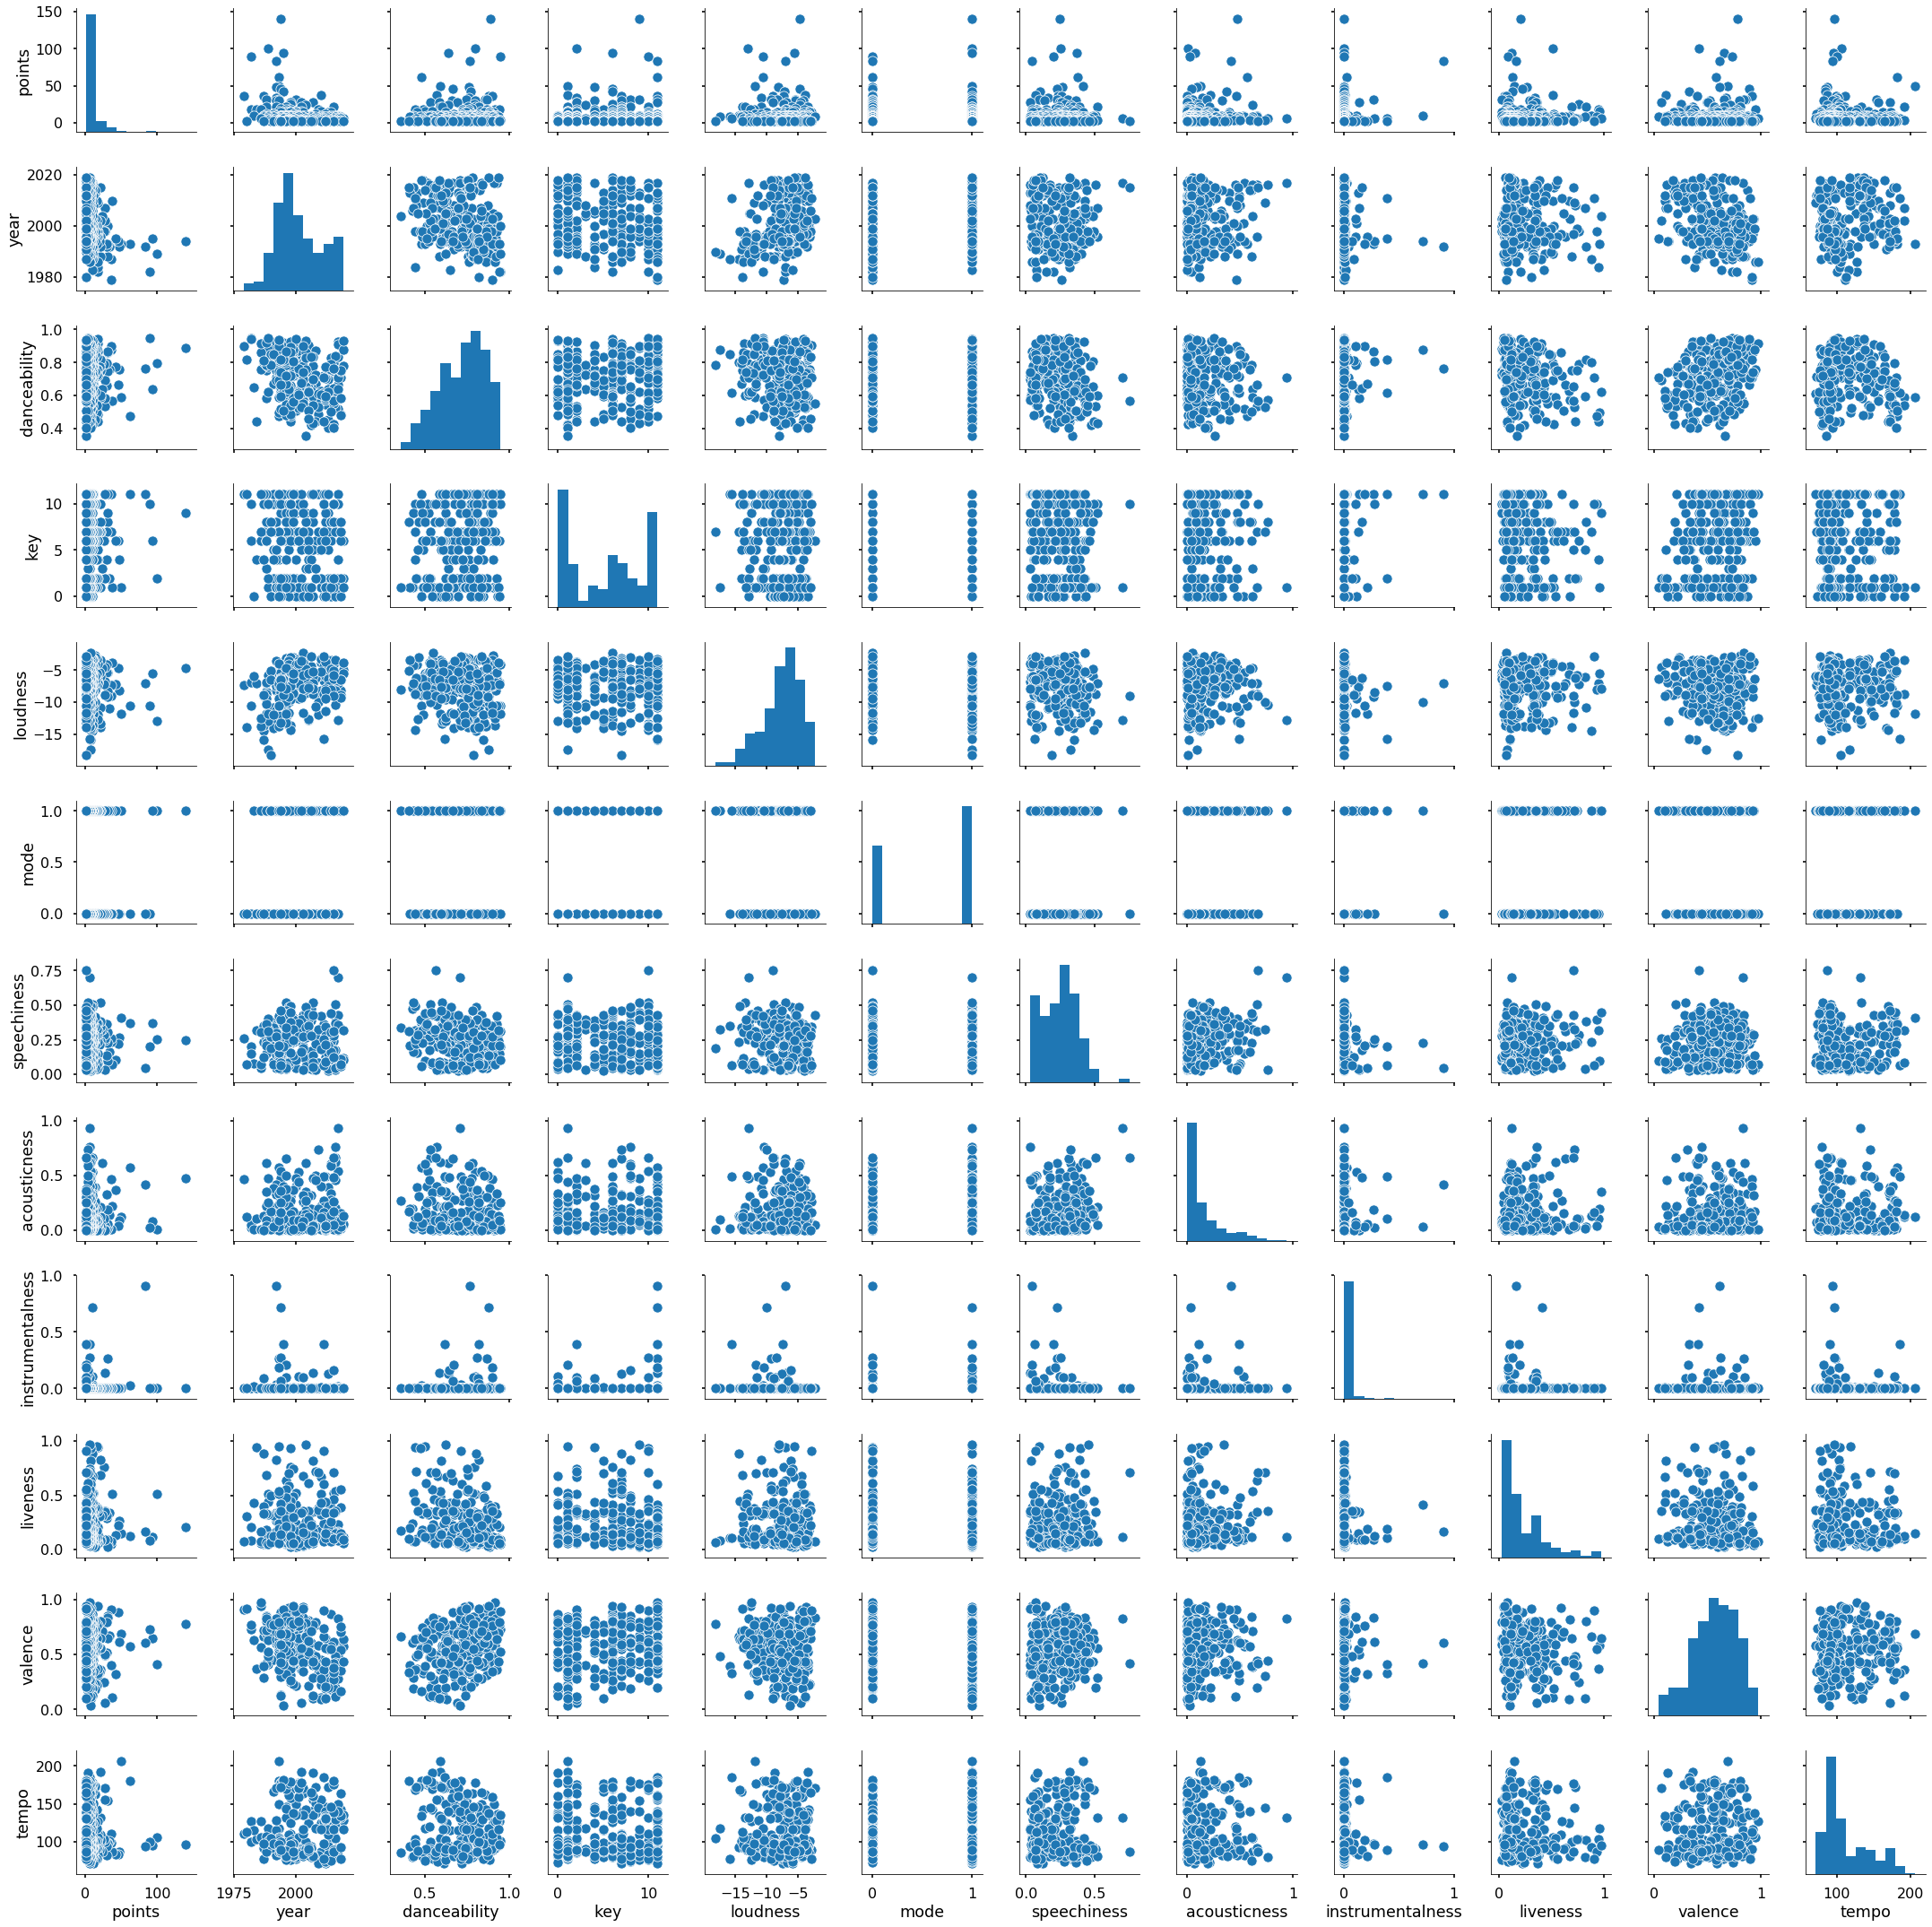

In [145]:
sns.pairplot(df[['points','year','danceability','key','loudness','mode','speechiness','acousticness', 'instrumentalness','liveness','valence','tempo']])

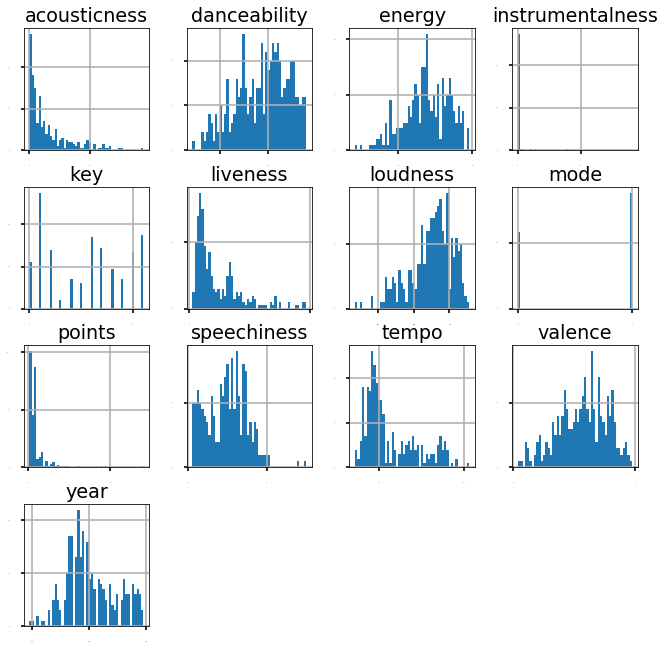

In [147]:
%matplotlib inline
ax = df.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

In [148]:
# Just get numeric data 

df_continuous = df[['year','danceability','key','loudness','mode','speechiness','acousticness', 'instrumentalness','liveness','valence','tempo']]

df_continuous.corr()


,year,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
year,1.000000,-0.349034,-0.131942,0.311274,0.096653,-0.067436,0.165319,-0.067740,-0.007936,-0.373821,0.168324
danceability,-0.349034,1.000000,0.117719,-0.102826,0.021533,-0.190232,-0.169659,0.073675,-0.278734,0.319196,-0.189738
key,-0.131942,0.117719,1.000000,-0.102648,-0.237964,-0.010212,0.045765,0.148281,0.004984,0.162565,-0.029304
loudness,0.311274,-0.102826,-0.102648,1.000000,0.051339,-0.140592,-0.055691,-0.101087,-0.010925,-0.016929,0.040207
mode,0.096653,0.021533,-0.237964,0.051339,1.000000,-0.060217,0.087619,-0.011103,-0.042392,-0.037083,0.058746
speechiness,-0.067436,-0.190232,-0.010212,-0.140592,-0.060217,1.000000,0.224256,-0.145380,0.051511,0.066434,-0.006639
acousticness,0.165319,-0.169659,0.045765,-0.055691,0.087619,0.224256,1.000000,0.058028,0.077090,0.012492,0.036299
instrumentalness,-0.067740,0.073675,0.148281,-0.101087,-0.011103,-0.145380,0.058028,1.000000,-0.026641,-0.032780,-0.031372
liveness,-0.007936,-0.278734,0.004984,-0.010925,-0.042392,0.051511,0.077090,-0.026641,1.000000,-0.144499,-0.066194
valence,-0.373821,0.319196,0.162565,-0.016929,-0.037083,0.066434,0.012492,-0.032780,-0.144499,1.000000,-0.027178


In [149]:
# Standard Scalar!

df_z = StandardScaler().fit_transform(df_continuous)

print("mean: ", np.round(df_z.mean(), 2))
print("standard dev: ", np.round(df_z.std(), 2))

mean:  0.0
standard dev:  1.0


In [151]:
df_z

array([[-0.73283345,  1.25044189,  0.95973441, ..., -0.14811524,
         1.04105653, -0.53832895],
       [-1.29258371,  0.56577346, -0.90077152, ...,  1.44057968,
        -0.75517602, -0.21699851],
       [-0.62088339, -0.62495425,  0.16237473, ..., -0.58462566,
         0.42081048, -0.57510149],
       ...,
       [-0.73283345, -0.94496232,  0.16237473, ..., -0.47803591,
        -0.70059437,  1.91422127],
       [-0.17308319,  0.63275189,  1.49130753, ...,  0.33407651,
        -0.62616485, -0.83234728],
       [ 0.61056718,  0.85601334, -1.16655808, ..., -0.03137408,
         0.74830039,  1.69831624]])

### Running PCA

In [157]:
# from sklearn.decomposition import PCA
fit = PCA()
pca = fit.fit_transform(df_z)
pca

array([[ 1.13827112,  0.19623231, -0.89090798, ..., -0.17314735,
        -0.58165398,  0.75037096],
       [ 0.63558038,  0.46917205, -0.20805547, ..., -0.01741653,
        -0.51638734, -0.11218471],
       [ 0.16776363,  0.03969337, -0.9281895 , ...,  1.34660211,
         0.56288185,  0.54254786],
       ...,
       [-0.81516683,  1.89653079, -0.53379889, ..., -0.24519809,
        -0.76475834,  1.28799626],
       [ 0.80072486,  0.08549339,  1.44827951, ...,  0.63144082,
        -0.6911633 ,  0.21086533],
       [-0.64366472, -1.75507051, -1.30179399, ...,  0.23289523,
        -1.0910827 , -0.70465644]])

Text(0, 0.5, 'Variance Explained')

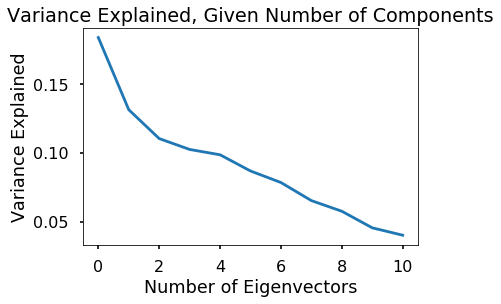

In [156]:
plt.plot(fit.explained_variance_ratio_)
plt.title("Variance Explained, Given Number of Components")
plt.xlabel("Number of Eigenvectors")
plt.ylabel("Variance Explained")

In [163]:
print(fit.explained_variance_ratio_)
print("--------------------")
print(fit.explained_variance_ratio_[:5].sum())
print("--------------------")
print("If we use ALL the data we can explain",fit.explained_variance_ratio_[:23].sum()*100," % of our data!")

[0.18376453 0.1313142  0.1103399  0.1024414  0.09855906 0.08679375
 0.07840215 0.06525874 0.05753192 0.04548385 0.04011049]
--------------------
0.6264190878671452
--------------------
If we use ALL the data we can explain 99.99999999999999  % of our data!


In [165]:
pca = pd.DataFrame(pca[:, :10], index=df.index)
pca

TypeError: '(slice(None, None, None), slice(None, 10, None))' is an invalid key

In [166]:
pca.rename(columns={0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5',5:'PC6',6:'PC7',7:'PC8',8:'PC9',9:'PC10'}, inplace=True)
pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.138271,0.196232,-0.890908,1.112319,-0.141811,-2.117130,0.613645,-0.617406,-0.173147,-0.581654
1,0.635580,0.469172,-0.208055,-1.195226,2.273670,1.422700,0.694658,-0.471644,-0.017417,-0.516387
2,0.167764,0.039693,-0.928190,-0.260520,-0.061315,-0.472773,-0.091654,0.526167,1.346602,0.562882
3,3.400829,0.171778,0.299250,-0.455629,-0.545105,0.596232,-0.268591,-0.498023,-0.268593,-0.219877
4,2.775638,0.467732,6.812645,6.167019,2.623782,-1.314122,0.118562,5.559966,0.130937,-0.042839
...,...,...,...,...,...,...,...,...,...,...
288,-0.242139,-0.846442,0.586149,-0.274773,1.604483,-0.459745,0.769822,0.375483,-0.437468,0.567783
289,-0.968228,0.043656,0.956006,-0.160111,-0.979115,1.164579,-0.910551,-0.255883,-0.284580,0.588260
290,-0.815167,1.896531,-0.533799,0.757684,-1.406158,1.270993,-0.372004,0.688699,-0.245198,-0.764758
291,0.800725,0.085493,1.448280,-1.116251,-0.907832,-0.580867,-0.484681,-0.467118,0.631441,-0.691163


In [167]:
pca = df.join(pca)
pca

,title,artist,points,year,danceability,energy,key,loudness,mode,speechiness,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,Juicy,The Notorious B.I.G.,140,1994,0.889,0.816,9,-4.670,1,0.2470,...,1.138271,0.196232,-0.890908,1.112319,-0.141811,-2.117130,0.613645,-0.617406,-0.173147,-0.581654
1,Fight The Power,Public Enemy,100,1989,0.797,0.582,2,-12.970,1,0.2550,...,0.635580,0.469172,-0.208055,-1.195226,2.273670,1.422700,0.694658,-0.471644,-0.017417,-0.516387
2,Shook Ones (Part II),Mobb Deep,94,1995,0.637,0.878,6,-5.506,1,0.3690,...,0.167764,0.039693,-0.928190,-0.260520,-0.061315,-0.472773,-0.091654,0.526167,1.346602,0.562882
3,The Message,Grandmaster Flash & The Furious Five,90,1982,0.947,0.607,10,-10.580,0,0.2020,...,3.400829,0.171778,0.299250,-0.455629,-0.545105,0.596232,-0.268591,-0.498023,-0.268593,-0.219877
4,Nuthin’ But A ‘G’ Thang,Dr Dre ft. Snoop Doggy Dogg,84,1992,0.766,0.559,11,-7.030,0,0.0469,...,2.775638,0.467732,6.812645,6.167019,2.623782,-1.314122,0.118562,5.559966,0.130937,-0.042839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Time’s Up,O.C.,2,1994,0.664,0.621,2,-6.521,1,0.0671,...,-0.242139,-0.846442,0.586149,-0.274773,1.604483,-0.459745,0.769822,0.375483,-0.437468,0.567783
289,Turn On The Lights,Future,2,2012,0.596,0.574,6,-9.373,0,0.2120,...,-0.968228,0.043656,0.956006,-0.160111,-0.979115,1.164579,-0.910551,-0.255883,-0.284580,0.588260
290,Warning,The Notorious B.I.G.,2,1994,0.594,0.785,6,-7.598,0,0.4610,...,-0.815167,1.896531,-0.533799,0.757684,-1.406158,1.270993,-0.372004,0.688699,-0.245198,-0.764758
291,Who Dat,J.T. Money ft. Solé,2,1999,0.806,0.823,11,-5.558,0,0.2450,...,0.800725,0.085493,1.448280,-1.116251,-0.907832,-0.580867,-0.484681,-0.467118,0.631441,-0.691163



What have we done here?

Tranformed raw data to series of linear combinations that explain the data
Have raw data and PC scores

### Interpretation of Components¶


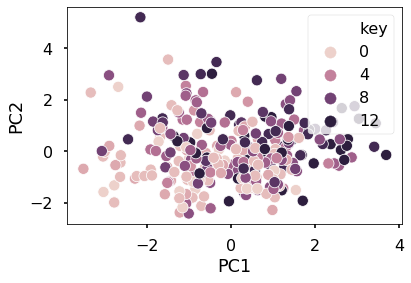

In [168]:
sns.scatterplot("PC1", "PC2", hue = "key", data = pca)


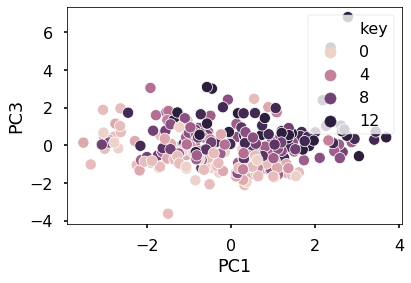

In [169]:
sns.scatterplot("PC1", "PC3", hue = "key", data = pca)


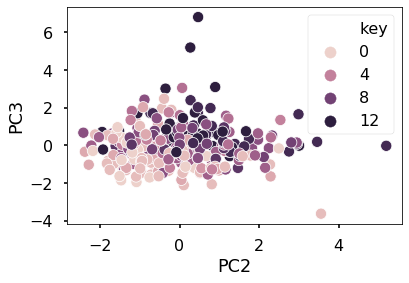

In [170]:
sns.scatterplot("PC2", "PC3", hue = "key", data = pca)


In [171]:
vects = fit.components_[:5]
vects

array([[-0.52144392,  0.50534727,  0.27005475, -0.25344616, -0.1474751 ,
        -0.05715534, -0.1768192 ,  0.13296114, -0.18940253,  0.42366917,
        -0.21500612],
       [-0.16289383, -0.29287692,  0.25655718, -0.37990627, -0.26932305,
         0.55334382,  0.41048901,  0.00726748,  0.35469683,  0.03914643,
        -0.05401602],
       [ 0.11432963, -0.09703811,  0.39683389,  0.00573738, -0.39293885,
        -0.42354224, -0.16574988,  0.50463167,  0.25788818, -0.35454306,
        -0.10899576],
       [ 0.17958304,  0.06921257,  0.22129854, -0.10586256,  0.29254647,
        -0.04802046,  0.50371976,  0.50537694, -0.3831039 ,  0.10499973,
         0.3846521 ],
       [-0.17090775,  0.08171834, -0.38796256, -0.39110288,  0.50778146,
        -0.08229327,  0.07554887,  0.30495968,  0.24217524, -0.28581667,
        -0.39619943]])

In [172]:
pca.sort_values(by='PC1')

,title,artist,points,year,danceability,energy,key,loudness,mode,speechiness,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
139,Takkies,YoungstaCPT,8,2016,0.526,0.626,2,-3.780,1,0.1740,...,-3.511140,-0.683586,0.144005,1.058551,0.389792,-0.738233,-0.971580,-0.377869,-0.466673,0.024415
76,How To Rap About Africa,Black Vulcanite,10,2016,0.535,0.669,1,-8.771,1,0.5040,...,-3.336835,2.274795,-1.017323,0.861830,1.567709,-1.066880,-1.484954,-0.232217,-0.340918,-0.475008
271,March Madness,Future,2,2015,0.406,0.661,8,-5.142,1,0.3110,...,-3.073536,0.005194,0.040569,1.363190,-1.424670,1.045595,0.137918,-0.244952,1.338974,0.524802
83,Mural,Lupe Fiasco,10,2015,0.431,0.898,1,-4.233,0,0.1660,...,-3.044594,-0.206073,1.886676,-2.201016,0.169709,-0.362409,-0.528260,0.661825,-0.371704,0.582967
213,I Like That,Janelle Monae,4,2018,0.482,0.453,0,-8.864,1,0.0590,...,-3.034174,-1.583002,0.676966,0.078284,0.865817,1.511952,-0.615339,-0.520816,-0.272562,1.098662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Top Billin’,Audio Two,10,1987,0.913,0.351,10,-13.570,0,0.3540,...,2.933357,1.745884,0.342842,-1.095075,0.138781,0.745684,0.009362,-0.610507,0.078137,-0.528575
12,Rapper’s Delight,Sugarhill Gang,36,1979,0.900,0.845,11,-7.306,0,0.2570,...,3.036783,1.259433,-0.575964,0.922296,-1.303747,-1.008636,0.307890,-0.151839,-1.070131,-0.310490
3,The Message,Grandmaster Flash & The Furious Five,90,1982,0.947,0.607,10,-10.580,0,0.2020,...,3.400829,0.171778,0.299250,-0.455629,-0.545105,0.596232,-0.268591,-0.498023,-0.268593,-0.219877
286,The Breaks,Kurtis Blow,2,1980,0.818,0.670,11,-13.912,0,0.0757,...,3.437734,1.083727,0.727864,-0.231415,-0.261487,0.931773,1.183252,-0.998197,-1.154445,0.966564


In [173]:

one = pd.Series(vects[0], index=df_continuous.columns)
one.sort_values(ascending=False)

danceability        0.505347
valence             0.423669
key                 0.270055
instrumentalness    0.132961
speechiness        -0.057155
mode               -0.147475
acousticness       -0.176819
liveness           -0.189403
tempo              -0.215006
loudness           -0.253446
year               -0.521444
dtype: float64

In [174]:
#repeat for each pc#